### Support Vector Machines
In the first part of this exercise, you will  build  support vector machines
(SVMs) for solving  binary classification problems. You will experiment with your
classifier on three example 2D datasets. Experimenting with these datasets
will help you gain  intuition into how SVMs work and how to use a Gaussian
kernel with SVMs. 

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython

%load_ext autoreload
%autoreload 2

### Data set 1
We will begin  with a 2D example dataset which can be separated by a
linear boundary.  In
this dataset, the positions of the positive examples (green circles) and the
negative examples (indicated with red circles) suggest a natural separation indicated
by the gap. However, notice that there is an outlier positive example  on
the far left at about (0.1, 4.1). As part of this exercise, you will also see how
this outlier affects the SVM decision boundary.

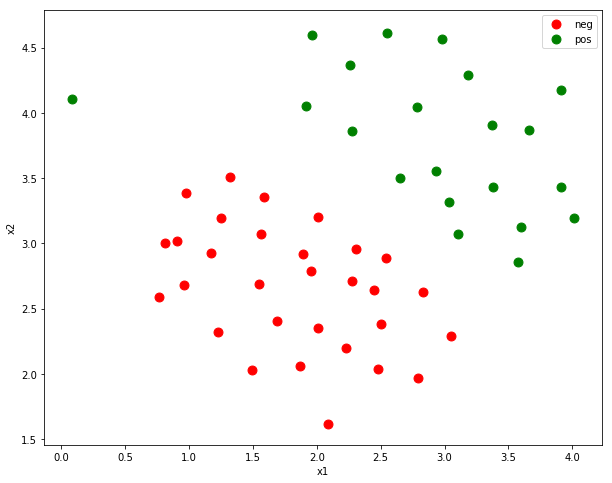

In [2]:
import linear_svm
import utils
from sklearn import preprocessing, metrics
from linear_classifier import LinearSVM_twoclass

############################################################################
#  Part  0: Loading and Visualizing Data                                   #
#  We start the exercise by first loading and visualizing the dataset.     #
#  The following code will load the dataset into your environment and plot #
#  the data.                                                               #
############################################################################

# load ex4data1.mat

X,y = utils.load_mat('data/ex4data1.mat')

utils.plot_twoclass_data(X,y,'x1', 'x2',['neg','pos'])
plt.show()

### The hinge loss function and gradient
Now you will implement the hinge loss cost function and its gradient for support vector machines.
Complete the **binary\_svm\_loss** function in **linear\_svm.py**  to return the cost and gradient for the hinge loss function.
 Recall that the hinge loss function is
$$ J(\theta) = \frac{1}{2m} \sum_{j=0}^{d} {\theta_j}^2 + \frac{C}{m} \sum_{i=1}^{m} max(0, 1 -y^{(i)}h_\theta(x^{(i)})) $$

where $h_{\theta}(x) = \theta^ T x$ with $x_0 = 1$.  $C$ is the penalty factor which measures how much misclassifications are penalized. If $y^{(i)}h_\theta(x^{(i)})) > 1$, then $x^{(i)}$ is correctly classified and the loss associated with that example is zero. If $y^{(i)}h_\theta(x^{(i)})) < 1$, then $x^{(i)}$ is not within the appropriate margin (positive or negative) and the loss associated with that example is greater than zero. The gradient of the hinge loss
function  is a vector of the same length as $\theta$ where the $j^{th}$ element, $j=0,1,\ldots,d$ is defined as follows:

\begin{eqnarray*} \frac{\partial J(\theta)}{\partial \theta_j}  & = &
\left \{
\begin{array}{l l}
\frac{1}{m} \theta_j + \frac{C}{m} \sum_{i=1}^{m} -y^{(i)}x_j^{(i)}& \mbox{ if } y^{(i)}h_\theta(x^{(i)})) < 1\\
\frac{1}{m} \theta_j & \mbox{ if } y^{(i)}h_\theta(x^{(i)})) >= 1\\
\end{array} \right. 
\end{eqnarray*}

Once you are done, the cell below will call your **binary\_svm\_loss** function with a zero vector $\theta$.
 You should see that the cost $J$ is 1.0. The gradient of the loss function with respect to an all-zeros $\theta$ vector is also computed and should be $[-0.12956186 -0.00167647]^T$.

In [3]:
############################################################################
#  Part 1: Hinge loss function and gradient                                #
############################################################################

C = 1
theta = np.zeros((X.shape[1],))

yy = np.ones(y.shape)
yy[y==0] = -1
J,grad = linear_svm.binary_svm_loss(theta,X,yy,C)
print(X.shape)
print(theta.shape)
print(yy.shape)

print "J = ", J, " grad = ", grad

(51L, 2L)
(2L,)
(51L,)
J =  1.0  grad =  [-0.12956186 -0.00167647]


### Impact of varying C
In this part of the exercise, you will try using different values of the C
parameter with SVMs. Informally, the C parameter is a positive value that
controls the penalty for misclassified training examples. A large C parameter
tells the SVM to try to classify all the examples correctly. C plays a role
similar to $\frac{1}{\lambda}$, where $\lambda$ is the regularization parameter that we were using
previously for logistic regression.

The SVM training function is in **linear\_classifier.py** -- this is a gradient descent algorithm that uses your loss and gradient functions. 
The cell below will train an SVM on the example data set 1 with C = 1. It first scales the data to have zero mean and unit variance, and adds the intercept term to the data matrix.
When C = 1, you should find that the SVM puts the decision boundary in
the gap between the two datasets and misclassifies the data point on the far
left. 

Your task is to try different values of C on this dataset. Specifically, you
should change the value of C in the cell below to C = 100 and run the SVM
training again. When C = 100, you should find that the SVM now classifies
every single example correctly, but has a decision boundary that does not
appear to be a natural fit for the data. Include a plot of the decision boundary for C = 100 in writeup.pdf.

Accuracy on training data =  0.9803921568627451


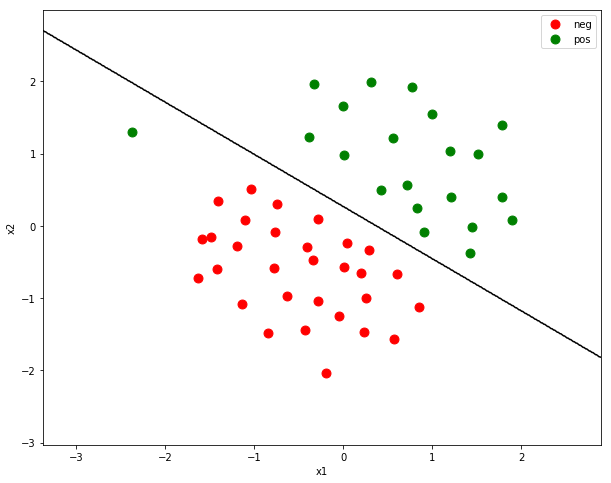

In [4]:
############################################################################
# Scale the data and set up the SVM training                               #
############################################################################

# scale the data

scaler = preprocessing.StandardScaler().fit(X)
scaleX = scaler.transform(X)

# add an intercept term and convert y values from [0,1] to [-1,1]

XX = np.array([(1,x1,x2) for (x1,x2) in scaleX])
yy = np.ones(y.shape)
yy[y == 0] = -1
yy[y == 0] = -1

############################################################################
#  Part  2: Training linear SVM                                            #
#  We train a linear SVM on the data set and the plot the learned          #
#  decision boundary                                                       #
############################################################################

############################################################################
# You will change this line below to vary C.                               #
############################################################################

C = 1

svm = LinearSVM_twoclass()
svm.theta = np.zeros((XX.shape[1],))
svm.train(XX,yy,learning_rate=1e-4,reg=C,num_iters=50000,verbose=False,batch_size=XX.shape[0])

# classify the training data

y_pred = svm.predict(XX)

print "Accuracy on training data = ", metrics.accuracy_score(yy,y_pred)

# visualize the decision boundary

utils.plot_decision_boundary(scaleX,y,svm,'x1','x2',['neg','pos'])

### SVMs with Gaussian kernels 
In this part of the exercise, you will be using SVMs to do non-linear classification.
In particular, you will be using SVMs with Gaussian kernels on
datasets that are not linearly separable.

To find non-linear decision boundaries with the SVM, we need to first implement
a Gaussian kernel. You can think of the Gaussian kernel as a similarity
function that measures the distance between a pair of examples,
$(x^{(i)}, x^{(j)})$. The Gaussian kernel is also parameterized by a bandwidth parameter,
$\sigma$,  which determines how fast the similarity metric decreases (to 0)
as the examples are further apart.
You should now complete the function **gaussian\_kernel** in **utils.py** to compute
the Gaussian kernel between two examples. The Gaussian kernel
function is defined as:

$$ k(x^{(i)},x^{(j)}) = exp\left(- \frac{{||x^{(i)}-x^{(j)}||}^2}{2\sigma^2}\right) $$

When you have completed the function, the cell below
will test your kernel function on two provided examples and you should expect
to see a value of 0.324652.

In [5]:
############################################################################
#  Part  3: Training SVM with a kernel                                     #
#  We train an SVM with an RBF kernel on the data set and the plot the     #
#  learned decision boundary                                               #
############################################################################

# test your Gaussian kernel implementation

x1 = np.array([1,2,1])
x2 = np.array([0,4,-1])
sigma = 2

print "Guassian kernel value (should be around 0.324652) = ", utils.gaussian_kernel(x1,x2,sigma)

Guassian kernel value (should be around 0.324652) =  0.32465246735834974


### SVMs with Gaussian kernels on Dataset 2
The next cell will load and plot dataset 2. From
the plot, you can observe that there is no linear decision boundary that
separates the positive and negative examples for this dataset. However, by
using the Gaussian kernel with the SVM, you will be able to learn a non-linear
decision boundary that can perform reasonably well for the dataset.
If you have correctly implemented the Gaussian kernel function, the cell below
will proceed to train the SVM with the Gaussian kernel on this dataset.

The decision boundary found by the SVM with C = 1 and a Gaussian
kernel with $\sigma = 0.01$ will be plotted. The decision boundary is able to separate most of the positive and
negative examples correctly and follows the contours of the dataset well.


(863L, 2L)
(863L, 863L)
(863L, 864L)
iteration 0 / 20000: loss 1.000000
iteration 100 / 20000: loss 0.909639
iteration 200 / 20000: loss 0.819280
iteration 300 / 20000: loss 0.728923
iteration 400 / 20000: loss 0.638568
iteration 500 / 20000: loss 0.549187
iteration 600 / 20000: loss 0.464934
iteration 700 / 20000: loss 0.385395
iteration 800 / 20000: loss 0.314347
iteration 900 / 20000: loss 0.255687
iteration 1000 / 20000: loss 0.209960
iteration 1100 / 20000: loss 0.174572
iteration 1200 / 20000: loss 0.148580
iteration 1300 / 20000: loss 0.127957
iteration 1400 / 20000: loss 0.111948
iteration 1500 / 20000: loss 0.099269
iteration 1600 / 20000: loss 0.088947
iteration 1700 / 20000: loss 0.080530
iteration 1800 / 20000: loss 0.073272
iteration 1900 / 20000: loss 0.066809
iteration 2000 / 20000: loss 0.061174
iteration 2100 / 20000: loss 0.056112
iteration 2200 / 20000: loss 0.051827
iteration 2300 / 20000: loss 0.048282
iteration 2400 / 20000: loss 0.045170
iteration 2500 / 20000: l

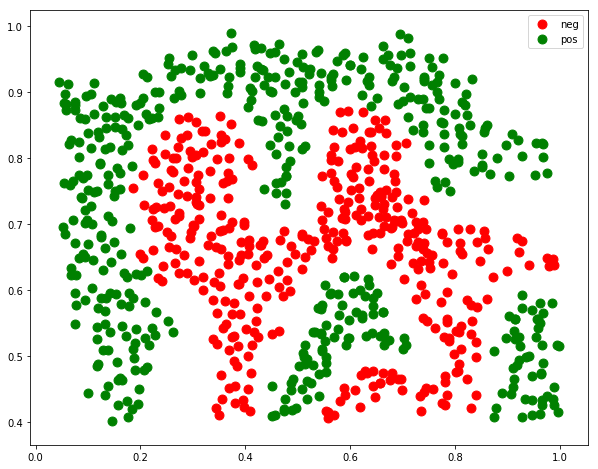

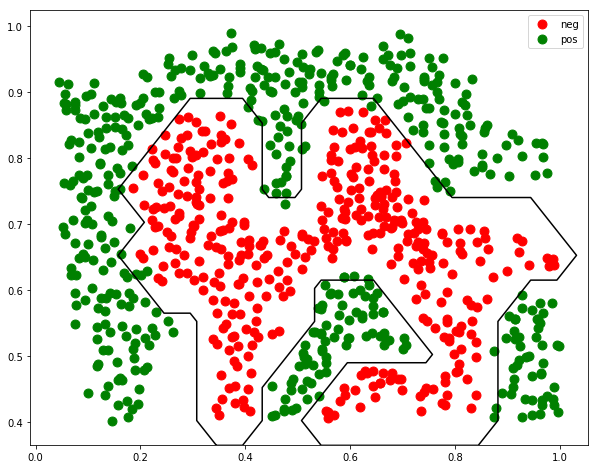

In [6]:
# load ex4data2.mat

X,y = utils.load_mat('data/ex4data2.mat')

print(X.shape)
# visualize the data

utils.plot_twoclass_data(X,y,'', '',['neg','pos'])

# convert X to kernel form with the kernel function

sigma = 0.02

# compute the kernel (slow!)

K = np.array([utils.gaussian_kernel(x1,x2,sigma) for x1 in X for x2 in X]).reshape(X.shape[0],X.shape[0])
# scale the kernelized data matrix

scaler = preprocessing.StandardScaler().fit(K)
scaleK = scaler.transform(K)

# add the intercept term

KK = np.vstack([np.ones((scaleK.shape[0],)),scaleK.T]).T
print(K.shape)
print(KK.shape)

# transform y from [0,1] to [-1,1]

yy = np.ones(y.shape)
yy[y == 0] = -1

# set up the SVM and learn the parameters

svm = LinearSVM_twoclass()
svm.theta = np.zeros((KK.shape[1],))
C = 1
svm.train(KK,yy,learning_rate=1e-4,reg=C,num_iters=20000,verbose=True,batch_size=KK.shape[0])

# visualize the boundary

utils.plot_decision_kernel_boundary(X,y,scaler,sigma,svm,'','',['neg','pos'])

### Selecting hyperparameters for SVMs with Gaussian kernels
In this part of the exercise, you will gain more practical skills on how to use
a SVM with a Gaussian kernel. The next cell will load and display
a third dataset. 
In the provided dataset, **ex4data3.mat**, you are given the variables **X**,
**y**, **Xval**, **yval**.  You will be using the SVM with the Gaussian
kernel with this dataset. Your task is to use the  validation set **Xval**, **yval** to determine the
best C and $\sigma$ parameter to use. You should write any additional code necessary
to help you search over the parameters C and $\sigma$. For both C and $\sigma$, we
suggest trying values in multiplicative steps (e.g., 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30).
Note that you should try all possible pairs of values for C and $\sigma$ (e.g., C = 0.3
and $\sigma$ = 0.1). For example, if you try each of the 8 values listed above for C
and for $\sigma$, you would end up training and evaluating (on the  validation
set) a total of $8^2 = 64$ different models.

When  selecting  the
best C and $\sigma$ parameter to use, you train on {\tt X,y} with a given C and $\sigma$, and then  evaluate the error of the model on the 
validation set. Recall that for classification, the error is defined as the
fraction of the  validation examples that were classified incorrectly.
You can use the **predict** method of the SVM classifier to generate the predictions for the
 validation set.
 
 After you have determined the best C and $\sigma$ parameters to use, you
should replace the assignments to **best\_C** and **best\_sigma** in the cell below. 

In [7]:
X,y,Xval,yval = utils.loadval_mat('data/ex4data3.mat')

K = np.array([utils.gaussian_kernel(x1,x2,sigma) for x1 in X for x2 in Xval]).reshape(X.shape[0],Xval.shape[0])
# scale the kernelized data matrix

scaler = preprocessing.StandardScaler().fit(K)
scaleK = scaler.transform(K)

# add the intercept term

KK = np.vstack([np.ones((scaleK.shape[0],)),scaleK.T]).T
print(K.shape)
print(KK.shape)
print(X.shape)

(211L, 200L)
(211L, 201L)
(211L, 2L)


(200L, 2L)
(211L, 2L)
(211L, 200L)
iteration 0 / 5000: loss 0.010000
iteration 100 / 5000: loss 0.009894
iteration 200 / 5000: loss 0.009789
iteration 300 / 5000: loss 0.009684
iteration 400 / 5000: loss 0.009580
iteration 500 / 5000: loss 0.009477
iteration 600 / 5000: loss 0.009373
iteration 700 / 5000: loss 0.009271
iteration 800 / 5000: loss 0.009170
iteration 900 / 5000: loss 0.009075
iteration 1000 / 5000: loss 0.008979
iteration 1100 / 5000: loss 0.008885
iteration 1200 / 5000: loss 0.008790
iteration 1300 / 5000: loss 0.008696
iteration 1400 / 5000: loss 0.008603
iteration 1500 / 5000: loss 0.008510
iteration 1600 / 5000: loss 0.008418
iteration 1700 / 5000: loss 0.008327
iteration 1800 / 5000: loss 0.008238
iteration 1900 / 5000: loss 0.008150
iteration 2000 / 5000: loss 0.008065
iteration 2100 / 5000: loss 0.007982
iteration 2200 / 5000: loss 0.007902
iteration 2300 / 5000: loss 0.007822
iteration 2400 / 5000: loss 0.007742
iteration 2500 / 5000: loss 0.007666
iteration 2600 

iteration 2200 / 5000: loss 0.002917
iteration 2300 / 5000: loss 0.002897
iteration 2400 / 5000: loss 0.002883
iteration 2500 / 5000: loss 0.002870
iteration 2600 / 5000: loss 0.002857
iteration 2700 / 5000: loss 0.002845
iteration 2800 / 5000: loss 0.002832
iteration 2900 / 5000: loss 0.002820
iteration 3000 / 5000: loss 0.002809
iteration 3100 / 5000: loss 0.002799
iteration 3200 / 5000: loss 0.002792
iteration 3300 / 5000: loss 0.002785
iteration 3400 / 5000: loss 0.002780
iteration 3500 / 5000: loss 0.002777
iteration 3600 / 5000: loss 0.002774
iteration 3700 / 5000: loss 0.002772
iteration 3800 / 5000: loss 0.002769
iteration 3900 / 5000: loss 0.002767
iteration 4000 / 5000: loss 0.002766
iteration 4100 / 5000: loss 0.002764
iteration 4200 / 5000: loss 0.002763
iteration 4300 / 5000: loss 0.002762
iteration 4400 / 5000: loss 0.002762
iteration 4500 / 5000: loss 0.002761
iteration 4600 / 5000: loss 0.002760
iteration 4700 / 5000: loss 0.002760
iteration 4800 / 5000: loss 0.002759
i

iteration 4400 / 5000: loss 0.006096
iteration 4500 / 5000: loss 0.006083
iteration 4600 / 5000: loss 0.006070
iteration 4700 / 5000: loss 0.006057
iteration 4800 / 5000: loss 0.006044
iteration 4900 / 5000: loss 0.006031
(211L, 200L)
iteration 0 / 5000: loss 0.030000
iteration 100 / 5000: loss 0.016084
iteration 200 / 5000: loss 0.012294
iteration 300 / 5000: loss 0.011231
iteration 400 / 5000: loss 0.010548
iteration 500 / 5000: loss 0.010132
iteration 600 / 5000: loss 0.009844
iteration 700 / 5000: loss 0.009613
iteration 800 / 5000: loss 0.009402
iteration 900 / 5000: loss 0.009193
iteration 1000 / 5000: loss 0.009019
iteration 1100 / 5000: loss 0.008851
iteration 1200 / 5000: loss 0.008698
iteration 1300 / 5000: loss 0.008584
iteration 1400 / 5000: loss 0.008484
iteration 1500 / 5000: loss 0.008394
iteration 1600 / 5000: loss 0.008308
iteration 1700 / 5000: loss 0.008243
iteration 1800 / 5000: loss 0.008184
iteration 1900 / 5000: loss 0.008134
iteration 2000 / 5000: loss 0.008088


iteration 1600 / 5000: loss 0.066767
iteration 1700 / 5000: loss 0.064866
iteration 1800 / 5000: loss 0.063077
iteration 1900 / 5000: loss 0.061386
iteration 2000 / 5000: loss 0.059725
iteration 2100 / 5000: loss 0.058134
iteration 2200 / 5000: loss 0.056597
iteration 2300 / 5000: loss 0.055129
iteration 2400 / 5000: loss 0.053702
iteration 2500 / 5000: loss 0.052390
iteration 2600 / 5000: loss 0.051130
iteration 2700 / 5000: loss 0.049950
iteration 2800 / 5000: loss 0.048838
iteration 2900 / 5000: loss 0.047774
iteration 3000 / 5000: loss 0.046762
iteration 3100 / 5000: loss 0.045812
iteration 3200 / 5000: loss 0.044905
iteration 3300 / 5000: loss 0.044035
iteration 3400 / 5000: loss 0.043180
iteration 3500 / 5000: loss 0.042361
iteration 3600 / 5000: loss 0.041567
iteration 3700 / 5000: loss 0.040826
iteration 3800 / 5000: loss 0.040106
iteration 3900 / 5000: loss 0.039431
iteration 4000 / 5000: loss 0.038788
iteration 4100 / 5000: loss 0.038170
iteration 4200 / 5000: loss 0.037581
i

iteration 3800 / 5000: loss 0.025756
iteration 3900 / 5000: loss 0.025685
iteration 4000 / 5000: loss 0.025629
iteration 4100 / 5000: loss 0.025586
iteration 4200 / 5000: loss 0.025547
iteration 4300 / 5000: loss 0.025510
iteration 4400 / 5000: loss 0.025475
iteration 4500 / 5000: loss 0.025440
iteration 4600 / 5000: loss 0.025405
iteration 4700 / 5000: loss 0.025370
iteration 4800 / 5000: loss 0.025342
iteration 4900 / 5000: loss 0.025314
(211L, 200L)
iteration 0 / 5000: loss 0.300000
iteration 100 / 5000: loss 0.296822
iteration 200 / 5000: loss 0.293644
iteration 300 / 5000: loss 0.290467
iteration 400 / 5000: loss 0.287291
iteration 500 / 5000: loss 0.284115
iteration 600 / 5000: loss 0.280940
iteration 700 / 5000: loss 0.277765
iteration 800 / 5000: loss 0.274645
iteration 900 / 5000: loss 0.271656
iteration 1000 / 5000: loss 0.268668
iteration 1100 / 5000: loss 0.265681
iteration 1200 / 5000: loss 0.262694
iteration 1300 / 5000: loss 0.259708
iteration 1400 / 5000: loss 0.256722


iteration 1000 / 5000: loss 0.098620
iteration 1100 / 5000: loss 0.096690
iteration 1200 / 5000: loss 0.094923
iteration 1300 / 5000: loss 0.093288
iteration 1400 / 5000: loss 0.091869
iteration 1500 / 5000: loss 0.090675
iteration 1600 / 5000: loss 0.089497
iteration 1700 / 5000: loss 0.088319
iteration 1800 / 5000: loss 0.087155
iteration 1900 / 5000: loss 0.086094
iteration 2000 / 5000: loss 0.085042
iteration 2100 / 5000: loss 0.084101
iteration 2200 / 5000: loss 0.083228
iteration 2300 / 5000: loss 0.082463
iteration 2400 / 5000: loss 0.081875
iteration 2500 / 5000: loss 0.081344
iteration 2600 / 5000: loss 0.080814
iteration 2700 / 5000: loss 0.080283
iteration 2800 / 5000: loss 0.079753
iteration 2900 / 5000: loss 0.079223
iteration 3000 / 5000: loss 0.078733
iteration 3100 / 5000: loss 0.078292
iteration 3200 / 5000: loss 0.077937
iteration 3300 / 5000: loss 0.077616
iteration 3400 / 5000: loss 0.077332
iteration 3500 / 5000: loss 0.077137
iteration 3600 / 5000: loss 0.076953
i

iteration 3200 / 5000: loss 0.202039
iteration 3300 / 5000: loss 0.200984
iteration 3400 / 5000: loss 0.199976
iteration 3500 / 5000: loss 0.198988
iteration 3600 / 5000: loss 0.198073
iteration 3700 / 5000: loss 0.197251
iteration 3800 / 5000: loss 0.196588
iteration 3900 / 5000: loss 0.195925
iteration 4000 / 5000: loss 0.195307
iteration 4100 / 5000: loss 0.194739
iteration 4200 / 5000: loss 0.194171
iteration 4300 / 5000: loss 0.193606
iteration 4400 / 5000: loss 0.193074
iteration 4500 / 5000: loss 0.192543
iteration 4600 / 5000: loss 0.192011
iteration 4700 / 5000: loss 0.191480
iteration 4800 / 5000: loss 0.190949
iteration 4900 / 5000: loss 0.190418
(211L, 200L)
iteration 0 / 5000: loss 1.000000
iteration 100 / 5000: loss 0.535778
iteration 200 / 5000: loss 0.409018
iteration 300 / 5000: loss 0.373311
iteration 400 / 5000: loss 0.350305
iteration 500 / 5000: loss 0.336239
iteration 600 / 5000: loss 0.326446
iteration 700 / 5000: loss 0.318586
iteration 800 / 5000: loss 0.311347

iteration 400 / 5000: loss 2.742238
iteration 500 / 5000: loss 2.677808
iteration 600 / 5000: loss 2.613382
iteration 700 / 5000: loss 2.549070
iteration 800 / 5000: loss 2.486931
iteration 900 / 5000: loss 2.424797
iteration 1000 / 5000: loss 2.362667
iteration 1100 / 5000: loss 2.300540
iteration 1200 / 5000: loss 2.238418
iteration 1300 / 5000: loss 2.177645
iteration 1400 / 5000: loss 2.117093
iteration 1500 / 5000: loss 2.057339
iteration 1600 / 5000: loss 1.999372
iteration 1700 / 5000: loss 1.941922
iteration 1800 / 5000: loss 1.887798
iteration 1900 / 5000: loss 1.836605
iteration 2000 / 5000: loss 1.786299
iteration 2100 / 5000: loss 1.738091
iteration 2200 / 5000: loss 1.691492
iteration 2300 / 5000: loss 1.646943
iteration 2400 / 5000: loss 1.603630
iteration 2500 / 5000: loss 1.563742
iteration 2600 / 5000: loss 1.525454
iteration 2700 / 5000: loss 1.489544
iteration 2800 / 5000: loss 1.455695
iteration 2900 / 5000: loss 1.423273
iteration 3000 / 5000: loss 1.392428
iterati

iteration 2600 / 5000: loss 0.815508
iteration 2700 / 5000: loss 0.810332
iteration 2800 / 5000: loss 0.805234
iteration 2900 / 5000: loss 0.800486
iteration 3000 / 5000: loss 0.795936
iteration 3100 / 5000: loss 0.791385
iteration 3200 / 5000: loss 0.786834
iteration 3300 / 5000: loss 0.782291
iteration 3400 / 5000: loss 0.778124
iteration 3500 / 5000: loss 0.774417
iteration 3600 / 5000: loss 0.770960
iteration 3700 / 5000: loss 0.768352
iteration 3800 / 5000: loss 0.765881
iteration 3900 / 5000: loss 0.763626
iteration 4000 / 5000: loss 0.761833
iteration 4100 / 5000: loss 0.760445
iteration 4200 / 5000: loss 0.759203
iteration 4300 / 5000: loss 0.758011
iteration 4400 / 5000: loss 0.756876
iteration 4500 / 5000: loss 0.755742
iteration 4600 / 5000: loss 0.754607
iteration 4700 / 5000: loss 0.753478
iteration 4800 / 5000: loss 0.752560
iteration 4900 / 5000: loss 0.751642
[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 0), (2, 1),

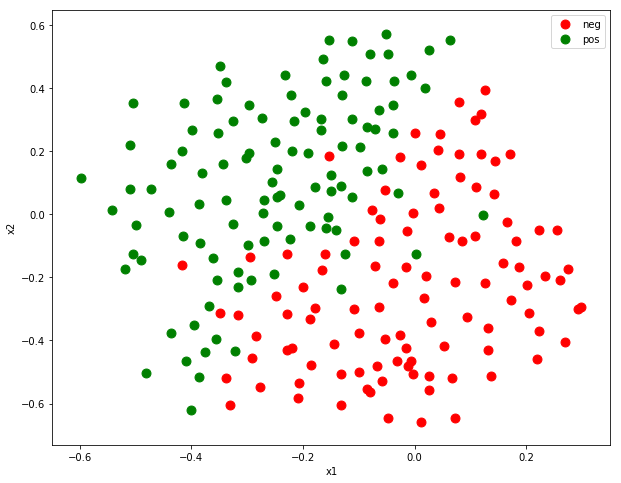

In [10]:
############################################################################
#  Part  4: Training SVM with a kernel                                     #
#  We train an SVM with an RBF kernel on the data set and the plot the     #
#  learned decision boundary                                               #
############################################################################

# load ex4data3.mat

X,y,Xval,yval = utils.loadval_mat('data/ex4data3.mat')


print(Xval.shape)
print(X.shape)
# transform y and yval from [0,1] to [-1,1]

yy = np.ones(y.shape)
yy[y == 0] = -1

yyval = np.ones(yval.shape)
yyval[yval == 0] = -1

# visualize the data

utils.plot_twoclass_data(X,y,'x1', 'x2',['neg','pos'])

############################################################################
# TODO                                                                     #
# select hyperparameters C and sigma for this dataset using                #
# Xval and yval                                                            #
############################################################################
Cvals = [0.01,0.03,0.1,0.3,1,3]
sigma_vals = [0.01,0.03,0.1,0.3,1,3]

results = {}
# TODO       
# select hyperparameters here; loopover all Cvals and sigma_vals. 
# About 8-10 lines of code here

k=0
for c in range(0,len(Cvals)):
    for s in range(0,len(sigma_vals)):
        sigma = sigma_vals[s]
        C= Cvals[c]
# compute the kernel (slow!)
        K_val = np.array([utils.gaussian_kernel(x1,x2,sigma) for x1 in Xval for x2 in Xval]).reshape(Xval.shape[0],Xval.shape[0])
        K_train  = np.array([utils.gaussian_kernel(x1,x2,sigma) for x1 in X for x2 in Xval]).reshape(X.shape[0],Xval.shape[0])
        
        #print(K_val.shape)
        print(K_train.shape)
# scale the kernelized data matrix
        scaler_val = preprocessing.StandardScaler().fit(K_val)
        scaleK_val = scaler_val.transform(K_val)
        
        scaler_train = preprocessing.StandardScaler().fit(K_train)
        scaleK_train = scaler_train.transform(K_train)
# add the intercept term
        KK_val = np.vstack([np.ones((scaleK_val.shape[0],)),scaleK_val.T]).T
        KK_train  = np.vstack([np.ones((scaleK_train.shape[0],)),scaleK_train.T]).T
# set up the SVM and learn the parameters        
        svm1 = LinearSVM_twoclass()
        svm1.theta = np.zeros((KK_train.shape[1],))
        svm1.train(KK_train,yy,learning_rate=1e-4,reg=C,num_iters=5000,verbose=True,batch_size=KK.shape[0])
        train_accuracy = np.mean(svm1.predict(KK_train) == yy)
        #print(KK_train.shape)
        #print(KK_val.shape)
        #svm = LinearSVM_twoclass()
        #svm.theta = np.zeros((KK.shape[1],))
        #svm.train(KK,yyval,learning_rate=1e-4,reg=C,num_iters=50,verbose=True,batch_size=KK.shape[0])
        val_accuracy = np.mean(svm1.predict(KK_val) == yyval)

        results[c,s] = {val_accuracy, train_accuracy}
        
# Print out results.
#print(sorted(results))
for c, s in sorted(results):
    val_accuracy, train_accuracy  = results[(c, s)]
    print 'c %e s %e val accuracy: %f train accuracy: %f' % (c, s, val_accuracy, train_accuracy)

############################################################################
#       END OF YOUR CODE                                                   #
############################################################################




iteration 0 / 20000: loss 0.010000
iteration 100 / 20000: loss 0.008392
iteration 200 / 20000: loss 0.006791
iteration 300 / 20000: loss 0.005217
iteration 400 / 20000: loss 0.004218
iteration 500 / 20000: loss 0.003711
iteration 600 / 20000: loss 0.003387
iteration 700 / 20000: loss 0.003164
iteration 800 / 20000: loss 0.003005
iteration 900 / 20000: loss 0.002888
iteration 1000 / 20000: loss 0.002807
iteration 1100 / 20000: loss 0.002737
iteration 1200 / 20000: loss 0.002683
iteration 1300 / 20000: loss 0.002638
iteration 1400 / 20000: loss 0.002602
iteration 1500 / 20000: loss 0.002569
iteration 1600 / 20000: loss 0.002536
iteration 1700 / 20000: loss 0.002505
iteration 1800 / 20000: loss 0.002476
iteration 1900 / 20000: loss 0.002453
iteration 2000 / 20000: loss 0.002432
iteration 2100 / 20000: loss 0.002412
iteration 2200 / 20000: loss 0.002395
iteration 2300 / 20000: loss 0.002378
iteration 2400 / 20000: loss 0.002361
iteration 2500 / 20000: loss 0.002345
iteration 2600 / 20000: 

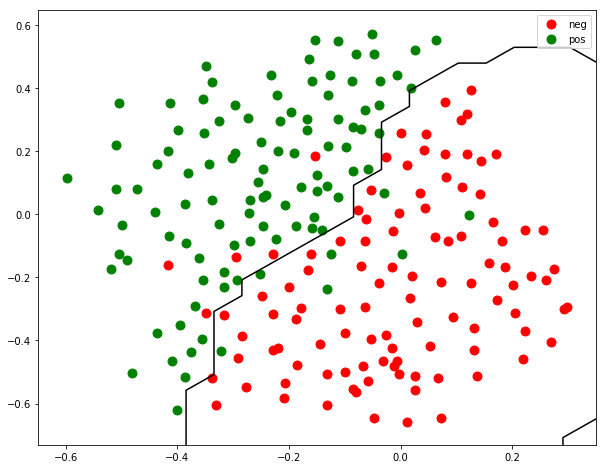

In [12]:
# TODO: make sure you put in the best_C and best_sigma from the analysis above!


best_C = 0.01
best_sigma = 0.1

# train an SVM on (X,y) with best_C and best_sigma
best_svm = LinearSVM_twoclass()
############################################################################
# TODO: construct the Gram matrix of the data with best_sigma, scale it, add the column of ones
# Then use svm_train to train best_svm with the best_C parameter. Use 20,000 iterations and
# a learning rate of 1e-4. Use batch_size of the entire training data set.
# About 5-6 lines of code expected here.
############################################################################
K = np.array([utils.gaussian_kernel(x1,x2,best_sigma) for x1 in X for x2 in X]).reshape(X.shape[0],X.shape[0])
scaler = preprocessing.StandardScaler().fit(K)
scaleK = scaler.transform(K)
KK = np.vstack([np.ones((scaleK.shape[0],)),scaleK.T]).T
best_svm.theta = np.zeros((KK.shape[1],))
best_svm.train(KK,yy,learning_rate=1e-4,reg=best_C,num_iters=20000,verbose=True,batch_size=KK.shape[0])


############################################################################
#       END OF YOUR CODE                                                   #
############################################################################

# visualize the boundary (uncomment this line after you learn the best svm)

utils.plot_decision_kernel_boundary(X,y,scaler,best_sigma,best_svm,'','',['neg','pos'])